In [1]:
# Import Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.result import marginal_distribution

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


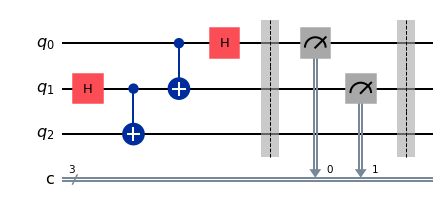

In [37]:
# Create circuit
teleport = QuantumCircuit(3, 3)
teleport.h(1)
teleport.cx(1,2)
teleport.cx(0,1)
teleport.h(0)
teleport.barrier()
teleport.measure(0,0)
teleport.measure(1,1)
teleport.barrier()

# Bob's corrections
#with teleport.if_test((1, 1)):
#    teleport.x(2)
#with teleport.if_test((0, 1)):
#    teleport.z(2)

teleport.draw(output="mpl")

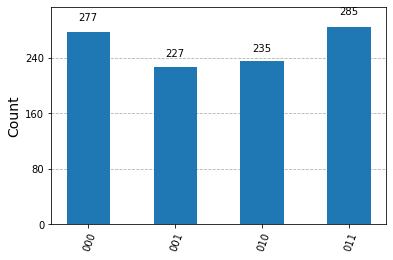

In [38]:
# Run and get counts
result = AerSimulator().run(teleport).result()
counts = result.get_counts(teleport)
plot_histogram(counts)

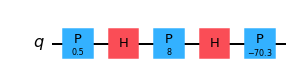

In [39]:
prepareState = QuantumCircuit(1)
prepareState.p(0.5,0)
prepareState.h(0)
prepareState.p(8,0)
prepareState.h(0)
prepareState.p(-70.3,0)
prepareState.draw(output="mpl")

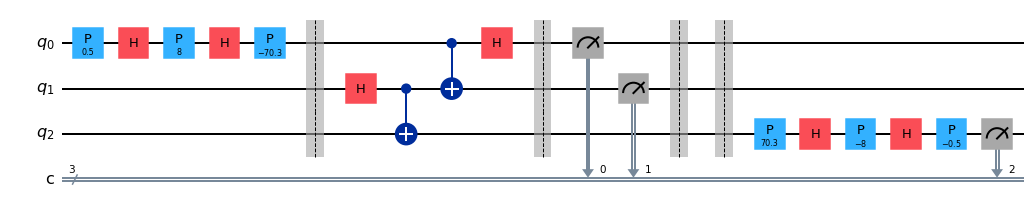

In [40]:
circ = QuantumCircuit(3,3)
circ = circ.compose(prepareState, [0])
circ.barrier()
circ = circ.compose(teleport)
circ.barrier()
circ = circ.compose(prepareState.inverse(), [2])
circ.measure(2,2)
circ.draw(output="mpl")

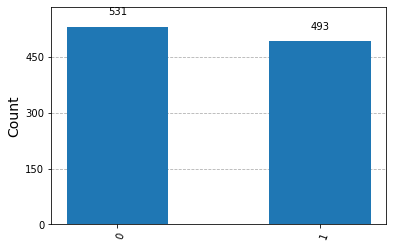

In [41]:
# Run and get counts
result = AerSimulator().run(circ).result()
statistics = result.get_counts(circ)
#plot_histogram(statistics)
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

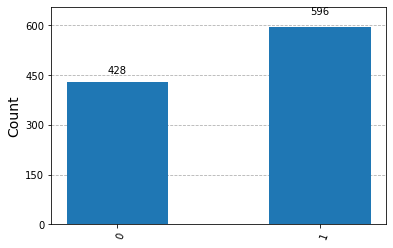

In [31]:
prepareStateMeas = QuantumCircuit(1,1)
prepareStateMeas = prepareStateMeas.compose(prepareState)
prepareStateMeas.measure(0,0)
result = AerSimulator().run(prepareStateMeas).result()
statistics = result.get_counts(prepareStateMeas)
plot_histogram(statistics)